In [1]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
c = 3e8
G = 6.67e-11
pi = np.pi
const = 96/5*pi**(8/3)*(G/c**3)**(5/3)

In [28]:
lower_f = 20
upper_f = 2000 #?

## Parameter space

In [29]:
def beta_calc(f, M):
    M_temp = M*2e30
    return const*f**(8/3)*M_temp**(5/3)

In [30]:
fspace = np.linspace(20, 200, 1000)
Mspace = np.logspace(-5, -3, 1000)

[fgrid, Mgrid] = np.meshgrid(fspace, Mspace)
betaGrid = beta_calc(fgrid, Mgrid)

Text(0, 0.5, '$M_c$ ($M_\\odot$)')

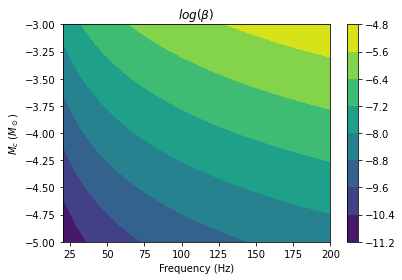

In [31]:
pl.contourf(fspace, np.log10(Mspace), np.log10(betaGrid))
pl.colorbar()
pl.title(r'$log(\beta)$')
pl.xlabel("Frequency (Hz)")
pl.ylabel(r'$M_c$ ($M_\odot$)')

In [32]:
def t_max_calc(f0, M, f_max):
    temp0 = (M/1e-2)**(-5/3)
    temp1 = (f0/200)**(-8/3) - (f_max/200)**(-8/3)
    return 1e3*temp0*temp1

def t_max_calc1(f0, beta, f_max):
    temp0 = 0.37/beta
    temp1 = 1-(f0/f_max)**(8/3)
    return temp0*temp1

In [33]:
tMax_grid = t_max_calc(fgrid, Mgrid, upper_f)
tMax_grid[tMax_grid>3e7] = 3e7

$$ d = \sqrt{\frac{5.737 \times 10^{-5}}{\lambda^* T_{max}} }
\frac{c\beta}{f_0^2} 
\sqrt{\int_{t0}^{t0+T_{max}} \frac{(1-\frac{8}{3}\beta t)^{-1/2}}{S_n(f(t))}}$$

Text(0, 0.5, '$M_c$ ($M_\\odot$)')

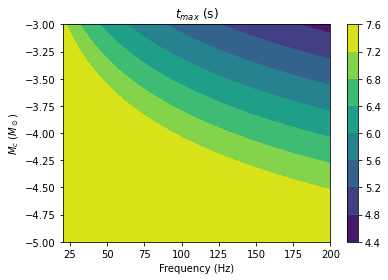

In [34]:
pl.contourf(fspace, np.log10(Mspace), np.log10(tMax_grid))
pl.colorbar()
pl.title(r'$t_{max}$ (s)')
pl.xlabel("Frequency (Hz)")
pl.ylabel(r'$M_c$ ($M_\odot$)')

In [35]:
def f_calc(f0, t, beta):
    return f0*np.power(1-8/3*beta*t,-3/8)

In [36]:
fMax_grid = f_calc(fgrid, tMax_grid, betaGrid)

Text(0, 0.5, '$M_c$ ($M_\\odot$)')

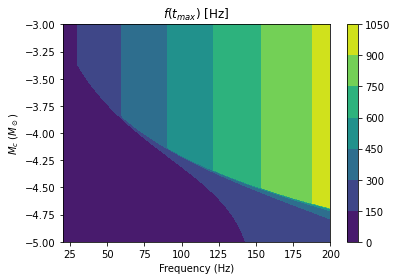

In [37]:
pl.contourf(fspace, np.log10(Mspace), fMax_grid)
pl.colorbar()
pl.title(r'$f(t_{max})$ [Hz]')
pl.xlabel("Frequency (Hz)")
pl.ylabel(r'$M_c$ ($M_\odot$)')

Text(0, 0.5, '$M_c$ ($M_\\odot$)')

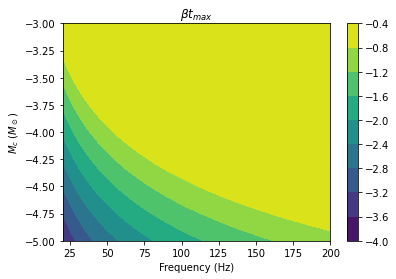

In [38]:
pl.contourf(fspace, np.log10(Mspace), np.log10(tMax_grid*betaGrid))
pl.colorbar()
pl.title(r'$\beta t_{max}$')
pl.xlabel("Frequency (Hz)")
pl.ylabel(r'$M_c$ ($M_\odot$)')

## Next window f

In [68]:
lower_fspace = np.linspace(19, 20, 1000)
Mspace = np.logspace(-5, -3, 1000)

[lower_fgrid, Mgrid] = np.meshgrid(lower_fspace, Mspace)
lower_betaGrid = beta_calc(lower_fgrid, Mgrid)

reached_f = f_calc(lower_fgrid, 1e6, lower_betaGrid)

In [69]:
np.max(reached_f)

20.354615027504867

Text(0, 0.5, '$M_c$ ($M_\\odot$)')

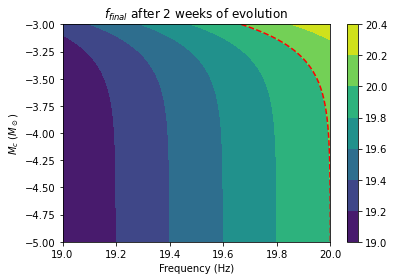

In [70]:
pl.contourf(lower_fspace, np.log10(Mspace), reached_f)
pl.colorbar()
pl.contour(lower_fspace, np.log10(Mspace), reached_f, [20], colors = 'r', linestyles = '--')
pl.title(r'$f_{final}$ after 2 weeks of evolution')
pl.xlabel("Frequency (Hz)")
pl.ylabel(r'$M_c$ ($M_\odot$)')

In [71]:
# Conclusions:
    
# Can extend the parameter space to higher masses 
# (if computational resources exist)
# Almost all signals caught within first time window 
# (esp. if including the f<20Hz in first time window 
# which catches signals which increase into the window)